#### To predict the car price using the featuers such as Brand, Price, Body, Mileage, EngineV, Engine Type, Registration, Year, Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv(r'C:\Users\sreedev\Downloads\Car Data.csv')
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
# Preprocessing

In [4]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [6]:
data1 = data.dropna(axis = 0)

In [7]:
data1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [8]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='Price', ylabel='Density'>

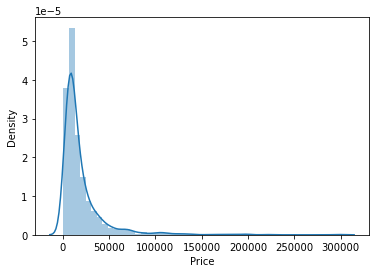

In [9]:
sns.distplot(data1['Price'])

In [10]:
q = data1['Price'].quantile(0.99)
data2 = data1[data1['Price']<q]
data2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000,3984
unique,7,NaN,6,NaN,NaN,4,2,NaN,302
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN,188
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922,NaN
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000,NaN
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


<AxesSubplot:xlabel='Price', ylabel='Density'>

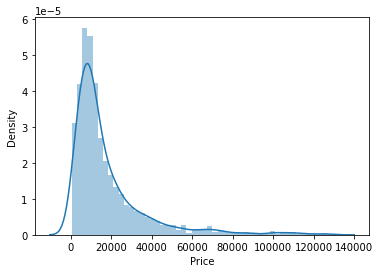

In [11]:
 sns.distplot(data2['Price'])

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

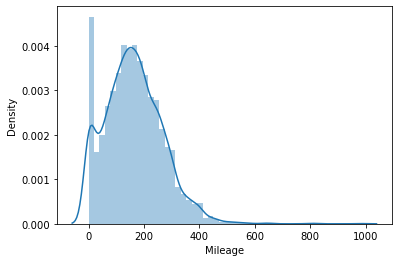

In [12]:
sns.distplot(data1['Mileage'])

In [13]:
q = data1['Mileage'].quantile(0.99)
data3 = data2[data2['Mileage']<q]

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

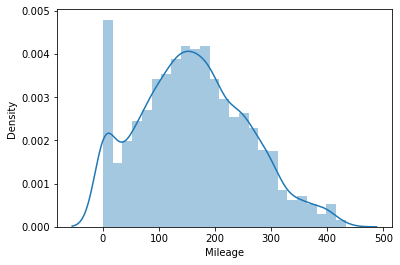

In [14]:
sns.distplot(data3['Mileage'])

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

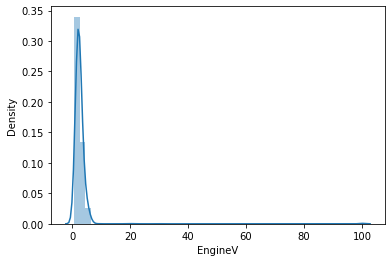

In [15]:
sns.distplot(data1['EngineV'])

In [16]:
engv = pd.DataFrame(data['EngineV'])
engv = engv.dropna(axis=0)
engv.sort_values(by='EngineV')

,EngineV
2512,0.60
188,0.65
3295,1.00
2725,1.00
1923,1.00
...,...
1311,99.99
3114,99.99
1264,99.99
3641,99.99


In [17]:
# Normally the engine values range from 0.6 to 6.5

In [18]:
data4 = data3[data3['EngineV']<6.5]

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

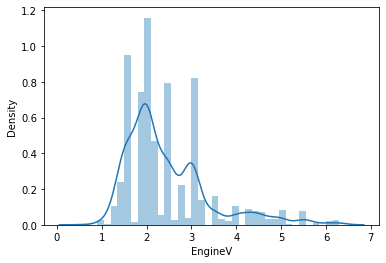

In [19]:
sns.distplot(data4['EngineV'])

<AxesSubplot:xlabel='Year', ylabel='Density'>

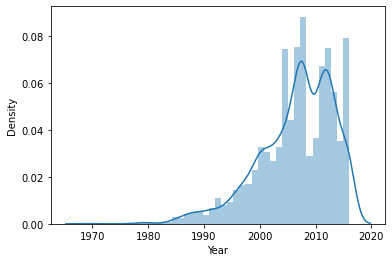

In [20]:
sns.distplot(data['Year'])

In [21]:
q = data4['Year'].quantile(0.01)
data5 = data4[data4['Year']>q]

<AxesSubplot:xlabel='Year', ylabel='Density'>

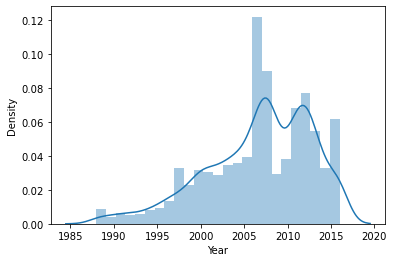

In [22]:
sns.distplot(data5['Year'])

In [23]:
## Resetting the indexes

In [24]:
data_cleaned = data5.reset_index(drop = True)

In [25]:
data_cleaned.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3866,3866.000000,3866,3866.000000,3866.000000,3866,3866,3866.000000,3866
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1466,NaN,NaN,1807,3504,NaN,181
mean,NaN,18197.480629,NaN,160.471547,2.450246,NaN,NaN,2006.713140,NaN
std,NaN,19087.396949,NaN,95.543697,0.949413,NaN,NaN,6.101235,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN


### OLS Assumptions

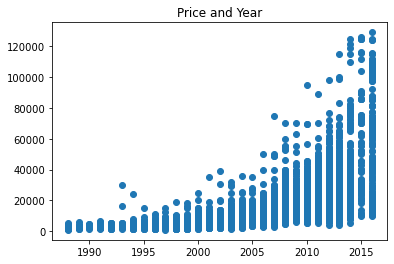

In [26]:
x1 = data_cleaned['Price']
y1 = data_cleaned['Year']
plt.scatter(y1,x1)
plt.title('Price and Year')
plt.show()

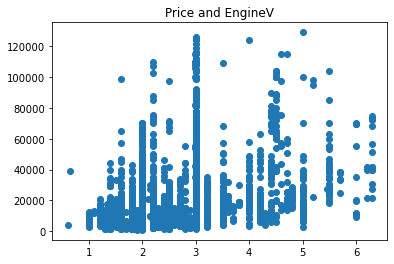

In [27]:
x2 = data_cleaned['Price']
y2 = data_cleaned['EngineV']
plt.scatter(y2,x2)
plt.title('Price and EngineV')
plt.show()

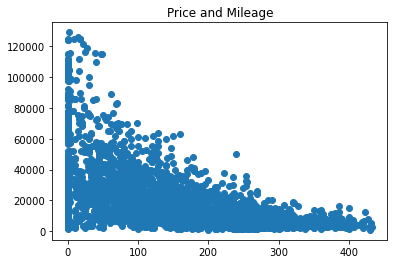

In [28]:
x3 = data_cleaned['Price']
y3 = data_cleaned['Mileage']
plt.scatter(y3,x3)
plt.title('Price and Mileage')
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Density'>

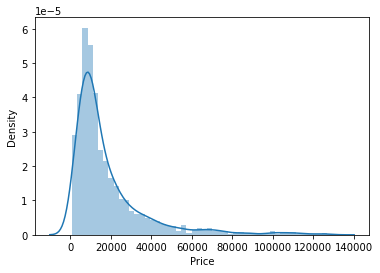

In [29]:
sns.distplot(data_cleaned['Price'])

Price is not normally distributed, hence the relationship will also be not linear. We can use log transformation When facing exponential relationships.

In [30]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price

In [31]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...,...
3861,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
3862,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
3863,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,11.736069
3864,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,8.779557


<AxesSubplot:xlabel='log_price', ylabel='Density'>

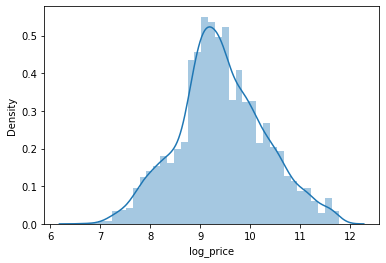

In [32]:
sns.distplot(data_cleaned['log_price'])

### Relation with Log Price

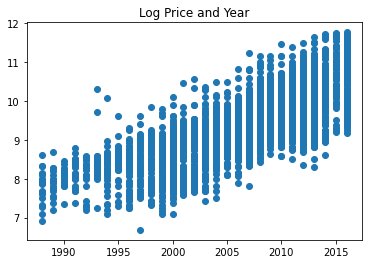

In [33]:
plt.scatter(data_cleaned['Year'],data_cleaned['log_price'])
plt.title('Log Price and Year')
plt.show()

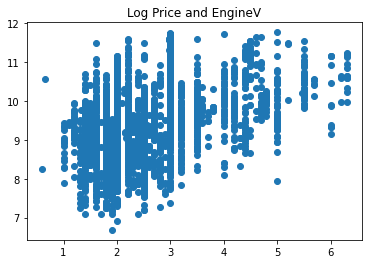

In [34]:
plt.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
plt.title('Log Price and EngineV')
plt.show()

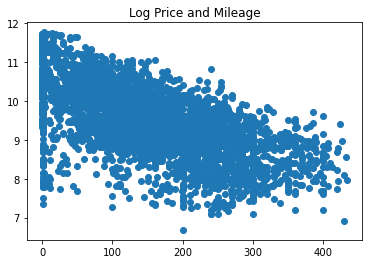

In [35]:
plt.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
plt.title('Log Price and Mileage')
plt.show()

In [36]:
data_cleaned = data_cleaned.drop(['Price'],axis =1)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Year', 'EngineV', 'Mileage']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values,i) for i in range (variables.shape[1])]
vif["Features"] = variables.columns

In [38]:
vif

,VIF,Features
0,10.360888,Year
1,7.660317,EngineV
2,3.794319,Mileage


VIF Values higher than 6 is commonly unacceptable. Hence on the the columns should be dropped.

In [39]:
data_cleaned1 = data_cleaned.drop(['Year','Model'],axis=1)

In [40]:
data_dummy = pd.get_dummies(data_cleaned1, drop_first = True)
data_dummy.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [41]:
data_dummy.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [42]:
cols = ['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [43]:
data_preprocessed = data_dummy[cols]
data_preprocessed.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


 Declaring inputs and targets


In [44]:
y = data_preprocessed['log_price']
x = data_preprocessed.drop(['log_price'],axis=1)

In [45]:
#Scaling Data

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [48]:
scaled_x = scaler.transform(x)

In [49]:
# train test split

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_x,y,test_size = 0.2, random_state = 365)

In [51]:
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [52]:
y_hat = LR.predict(x_train)

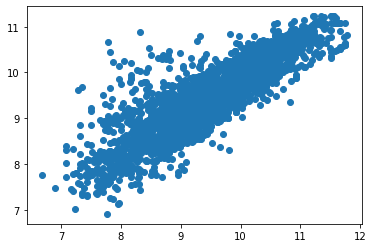

In [53]:
plt.scatter(y_train,y_hat)
plt.show()

<AxesSubplot:xlabel='log_price', ylabel='Density'>

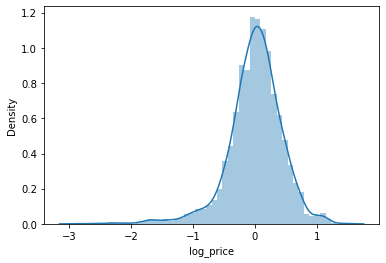

In [54]:
 #Residual Test
sns.distplot(y_train - y_hat)

Residuals are normally distributed as the mean is 0.

In [55]:
LR.score(x_train,y_train)

0.7415645182486199

In [56]:
#Weights and bias

In [57]:
LR.intercept_

9.413280072375791

In [58]:
LR.coef_

array([-0.44838367,  0.21092609,  0.01217236,  0.01091936, -0.13381235,
       -0.18243069, -0.05551416, -0.08742151, -0.15127967, -0.10115164,
       -0.19711525, -0.1281566 , -0.16265036, -0.12418232, -0.03326347,
       -0.14940858,  0.31944559])

In [60]:
LR_summary = pd.DataFrame(x.columns.values, columns = ['Features'])
LR_summary['Weights'] = LR.coef_
LR_summary

,Features,Weights
0,Mileage,-0.448384
1,EngineV,0.210926
2,Brand_BMW,0.012172
3,Brand_Mercedes-Benz,0.010919
4,Brand_Mitsubishi,-0.133812
5,Brand_Renault,-0.182431
6,Brand_Toyota,-0.055514
7,Brand_Volkswagen,-0.087422
8,Body_hatch,-0.151280
9,Body_other,-0.101152


### Testing

In [61]:
y_hat_test = LR.predict(x_test)

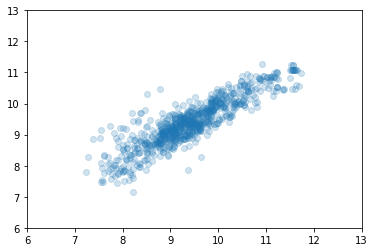

In [68]:
plt.scatter(y_test, y_hat_test,alpha = 0.2)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()